In [1]:
import gzip
import numpy as np
import struct # Para leer datos binarios estructurados
import matplotlib.pyplot as plt

# librerías de tensorflow
from tensorflow import keras

In [2]:
def read_idx_images(file_path):
    with gzip.open(file_path, "rb") as f:
        # obtenemos encabezado con magic number, número de imágenes y sus dimensiones
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        
        # Si el número mágico no es 2051 el archivo no se leyó correctamente y se lanza error
        if magic != 2051:
            raise ValueError(f"Número mágico inválido: {magic}. Se esperaba 2051.")
        
        # leemos los datos en binario, despues los transformamos a numpy.array y al final lo reformamos a sus formas correctas
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)
        images = images.reshape(num_images, rows, cols)

    # regresamos toda la información importante
    return images, num_images, rows, cols 

In [3]:
def read_idx_labels(file_path):
    with gzip.open(file_path, "rb") as f:
        # obtenemos del encabezado el magic number y el número de etiquetas
        magic, num_labels = struct.unpack(">II", f.read(8))

        # si el magic number no es el correcto se lanza error
        if magic != 2049:
            raise ValueError(f"Número mágico inválido: {magic}, Se espera 2049")
        
        # se cargan los datos y se les da formato
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)

    # se regresa la información importante
    return labels, num_labels

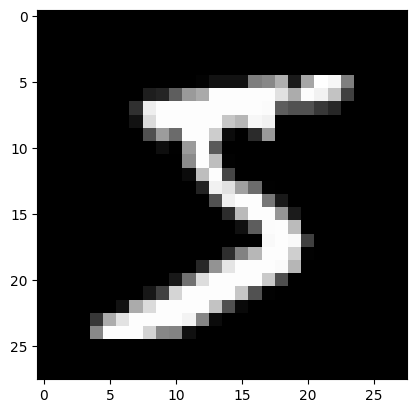

5


In [4]:
file_path = "train-images-idx3-ubyte.gz"
train_images, num_images, rows, cols = read_idx_images(file_path)

file_path = "train-labels-idx1-ubyte.gz"
train_target, num_labels = read_idx_labels(file_path)

plt.imshow(train_images[0], cmap='gray')
plt.show()
print(train_target[0])

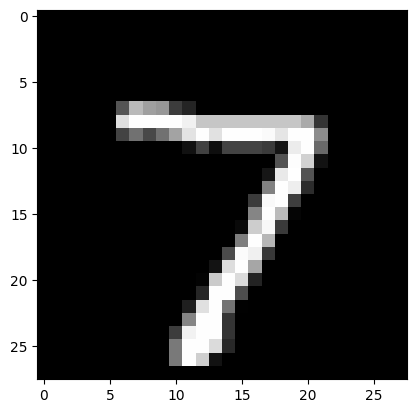

7


In [5]:
file_path = "t10k-images-idx3-ubyte.gz"
valid_images, num_images, rows, cols = read_idx_images(file_path)

file_path = "t10k-labels-idx1-ubyte.gz"
valid_target, num_labels = read_idx_labels(file_path)

plt.imshow(valid_images[0], cmap='gray')
plt.show()
print(valid_target[0])

In [6]:
model = keras.models.Sequential()
model.add(keras.Input(shape = (rows, cols, 1)))
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation="tanh", padding="same"))  
model.add(keras.layers.AvgPool2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation="tanh"))
model.add(keras.layers.AvgPool2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=120, activation="tanh"))
model.add(keras.layers.Dense(units=84, activation="tanh"))
model.add(keras.layers.Dense(units=10, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.fit(  
    train_images,
    train_target,
    validation_data=(valid_images, valid_target),
    batch_size=32,
    epochs=10,
    verbose=2,
    shuffle=True
)

Epoch 1/10
1875/1875 - 8s - 4ms/step - acc: 0.9246 - loss: 0.2499 - val_acc: 0.9378 - val_loss: 0.1935
Epoch 2/10
1875/1875 - 7s - 4ms/step - acc: 0.9450 - loss: 0.1881 - val_acc: 0.9331 - val_loss: 0.2251
Epoch 3/10
1875/1875 - 7s - 4ms/step - acc: 0.9380 - loss: 0.2103 - val_acc: 0.9510 - val_loss: 0.1838
Epoch 4/10
1875/1875 - 8s - 4ms/step - acc: 0.9374 - loss: 0.2095 - val_acc: 0.9494 - val_loss: 0.1741
Epoch 5/10
1875/1875 - 10s - 5ms/step - acc: 0.9415 - loss: 0.2008 - val_acc: 0.9353 - val_loss: 0.2071
Epoch 6/10
1875/1875 - 14s - 7ms/step - acc: 0.9320 - loss: 0.2334 - val_acc: 0.9232 - val_loss: 0.2628
Epoch 7/10
1875/1875 - 14s - 7ms/step - acc: 0.9334 - loss: 0.2269 - val_acc: 0.9492 - val_loss: 0.1740
Epoch 8/10
1875/1875 - 8s - 4ms/step - acc: 0.9390 - loss: 0.2022 - val_acc: 0.9313 - val_loss: 0.2286
Epoch 9/10
1875/1875 - 7s - 4ms/step - acc: 0.9336 - loss: 0.2205 - val_acc: 0.9382 - val_loss: 0.2134
Epoch 10/10
1875/1875 - 8s - 4ms/step - acc: 0.9324 - loss: 0.2300 - v

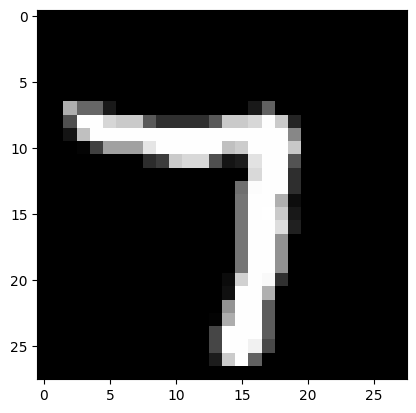

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
La predicción nos da: 7
la respuesta correcta es: 7


In [8]:
num_imagen = 2407
imagen = valid_images[num_imagen:num_imagen+1]
plt.imshow(imagen[0], cmap="gray")
plt.show()
pred = model.predict(imagen)
print(f"La predicción nos da:", np.argmax(pred))
print(f"la respuesta correcta es:", valid_target[num_imagen])